# Tugas Prapraktikum

Tugas Prapraktikum dikerjakan dengan _dataset_ [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/download?datasetVersionNumber=2). Tanpa meninjau waktu (`date`), prediksi status hujan pada keesokan harinya (`RainTomorrow`). Berikan nilai `1` jika diprediksi hujan pada keesokan harinya, `0` jika tidak.

<br>
Tugas dikerjakan secara berkelompok. Setiap kelompok terdiri atas 2 (dua) mahasiswa. Kumpulkan paling lambat pada Minggu, 16 April 2023, pukul 23:59 WIB melalui Edunex.

# 0. Persiapan Data and Pustaka

In [9]:
# Letakkan pustaka di sini.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Baca data di sini.
df = pd.read_csv('weatherAUS.csv')

In [3]:
# Definisi variabel
target_name = 'RainTomorrow'

# I. Pemahaman Data
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal yang diliputi adalah sebagai berikut:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (_outlier_)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instansi dan fitur)
2. Tipe dari setiap fitur 
3. Banyak nilai unik dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal

In [4]:
# 1. Ukuran dari data (instansi dan fitur)
print("1. Ukuran dari data (instansi dan fitur)")
print("Jumlah Fitur: ", len(df.columns))
print(f"Jumlah Instansi: {len(df)}\n")

# 2. Tipe dari setiap fitur
print("2. Tipe dari setiap fitur")
print(df.dtypes, end="\n\n")

# 3. Banyak nilai unik dari fitur yang bertipe kategorikal
print("3. Banyak nilai unik dari fitur yang bertipe kategorikal")
categorical_features = df.select_dtypes(include=['object'])

print(categorical_features.nunique(), end="\n\n")

# 4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal
print("4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal")
non_categorical_features = df.select_dtypes(exclude=['object'])
print(non_categorical_features.describe(), end="\n\n")


1. Ukuran dari data (instansi dan fitur)
Jumlah Fitur:  23
Jumlah Instansi: 145460

2. Tipe dari setiap fitur
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

3. Banyak nilai unik dari fitur yang bertipe kategorikal
Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonk

## I.2
Carilah:
1. Nilai hilang (_missing_) dari setiap fitur
2. Nilai pencilan (_outlier_) dari setiap fitur

In [5]:
# 1. Nilai hilang (missing) dari setiap fitur
missing_val = df.isnull().sum()
print("1. Nilai hilang (missing) dari setiap fitur")
print(missing_val, end="\n\n")

# 2. Nilai pencilan (outlier) dari setiap fitur
iqr = non_categorical_features.quantile(0.75) - non_categorical_features.quantile(0.25)
min_vals = non_categorical_features.quantile(0.25) - 1.5 * iqr
max_vals = non_categorical_features.quantile(0.75) + 1.5 * iqr

outlier = non_categorical_features[(non_categorical_features < min_vals) | (non_categorical_features > max_vals)].count()
print("2. Nilai pencilan (outlier) dari setiap fitur")
print(outlier, end="\n\n")

1. Nilai hilang (missing) dari setiap fitur
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

2. Nilai pencilan (outlier) dari setiap fitur
MinTemp             54
MaxTemp            489
Rainfall         25578
Evaporation       1995
Sunshine             0
WindGustSpeed     3092
WindSpeed9am      1817
WindSpeed3pm      2523
Humidity9am       1425
Humidity3pm          0
Pressure9am       1191
Pressure3pm        919
Cloud9am             0
Cloud3pm             0
Temp9am            262
Temp3pm            764

## I.3
Lakukan:
1. Pencarian korelasi antarfitur
2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)
3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)

1. Pencarian korelasi antarfitur
                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 

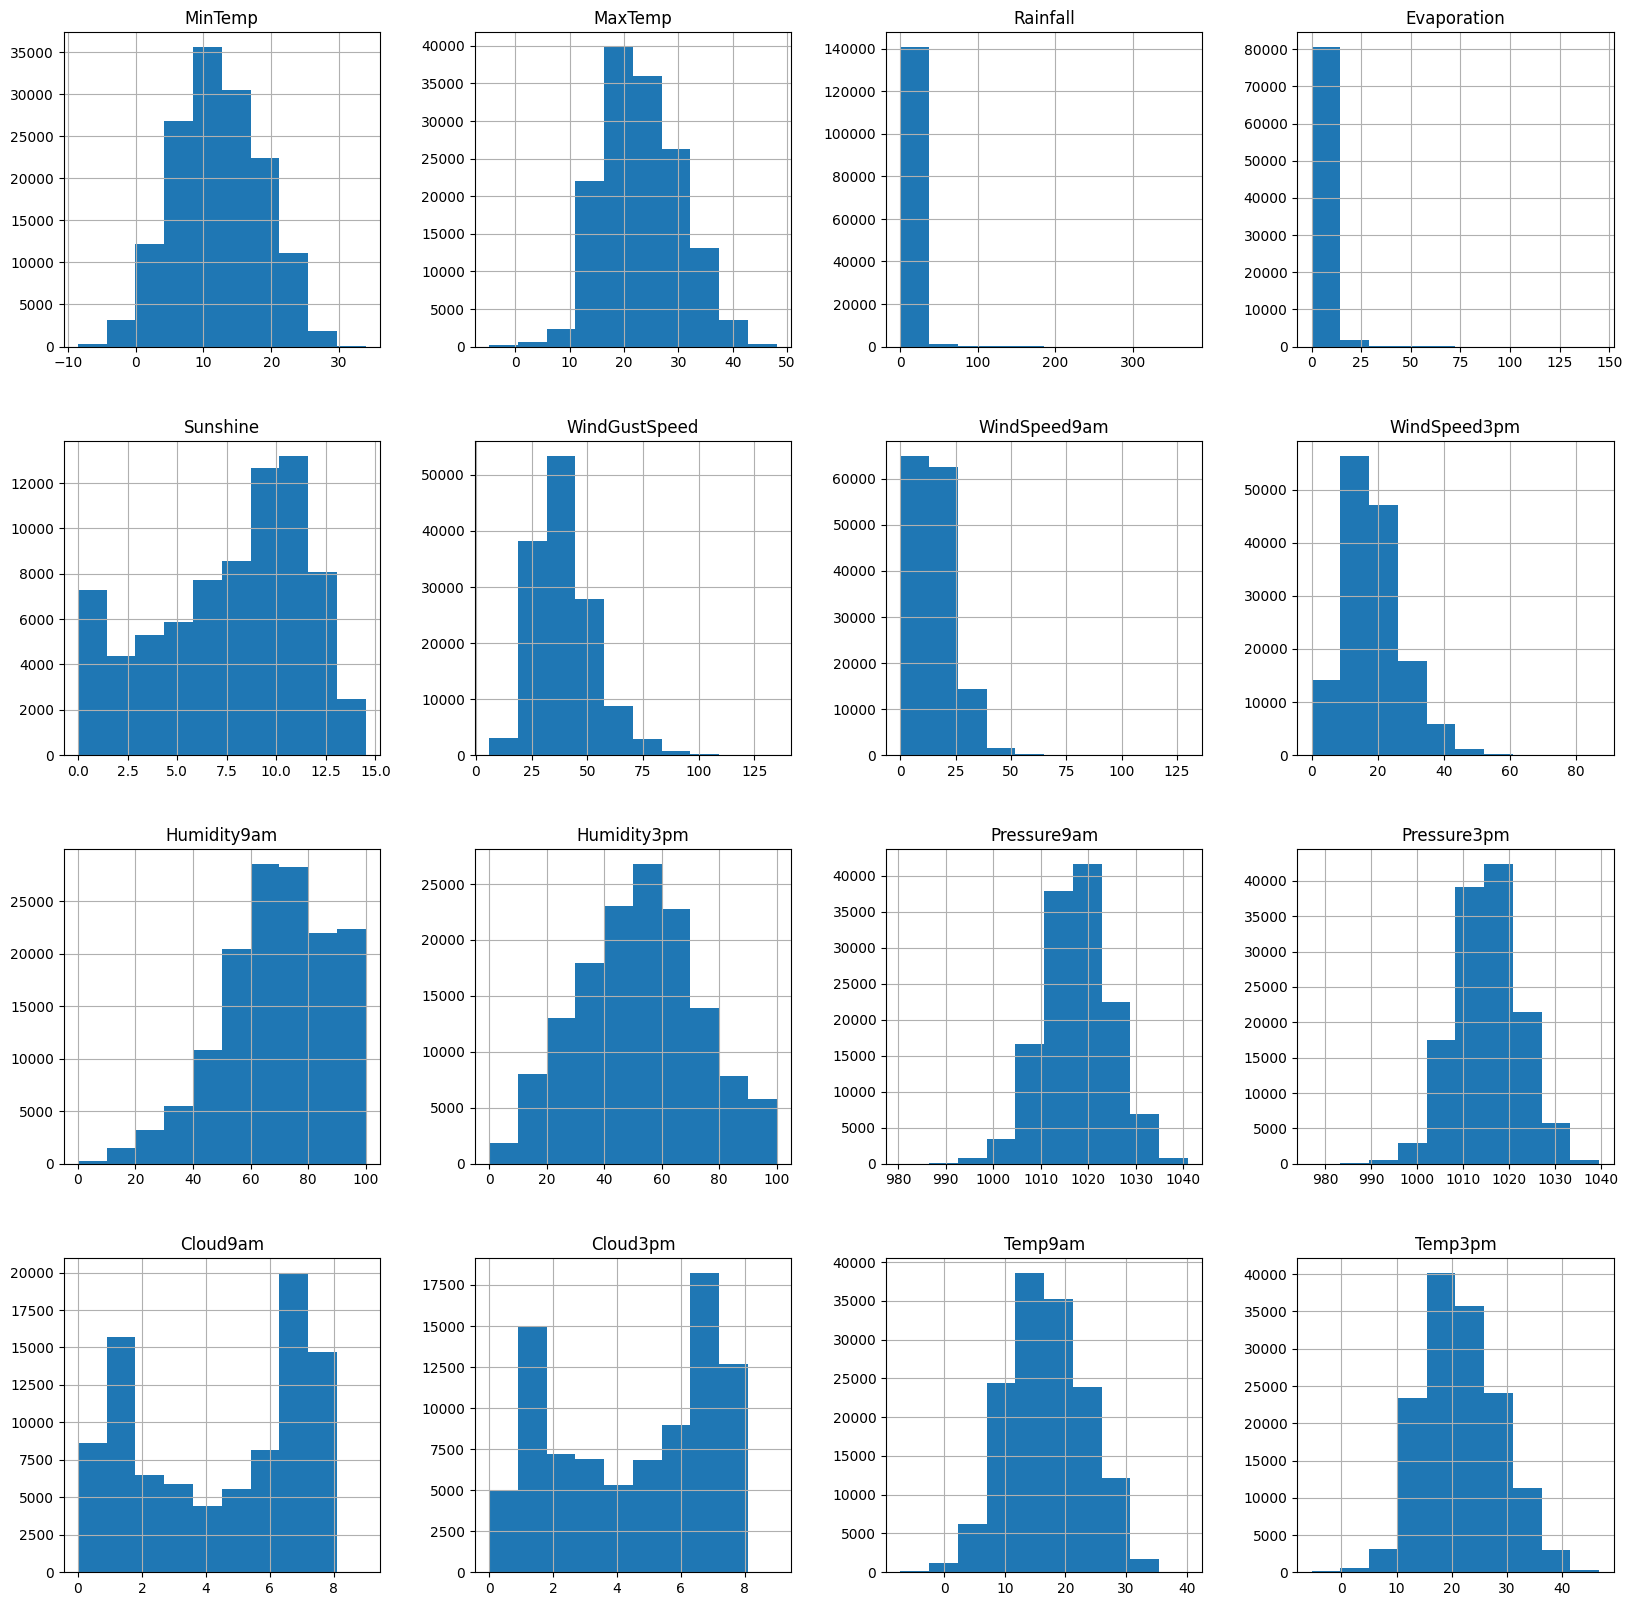

3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)
Target: No


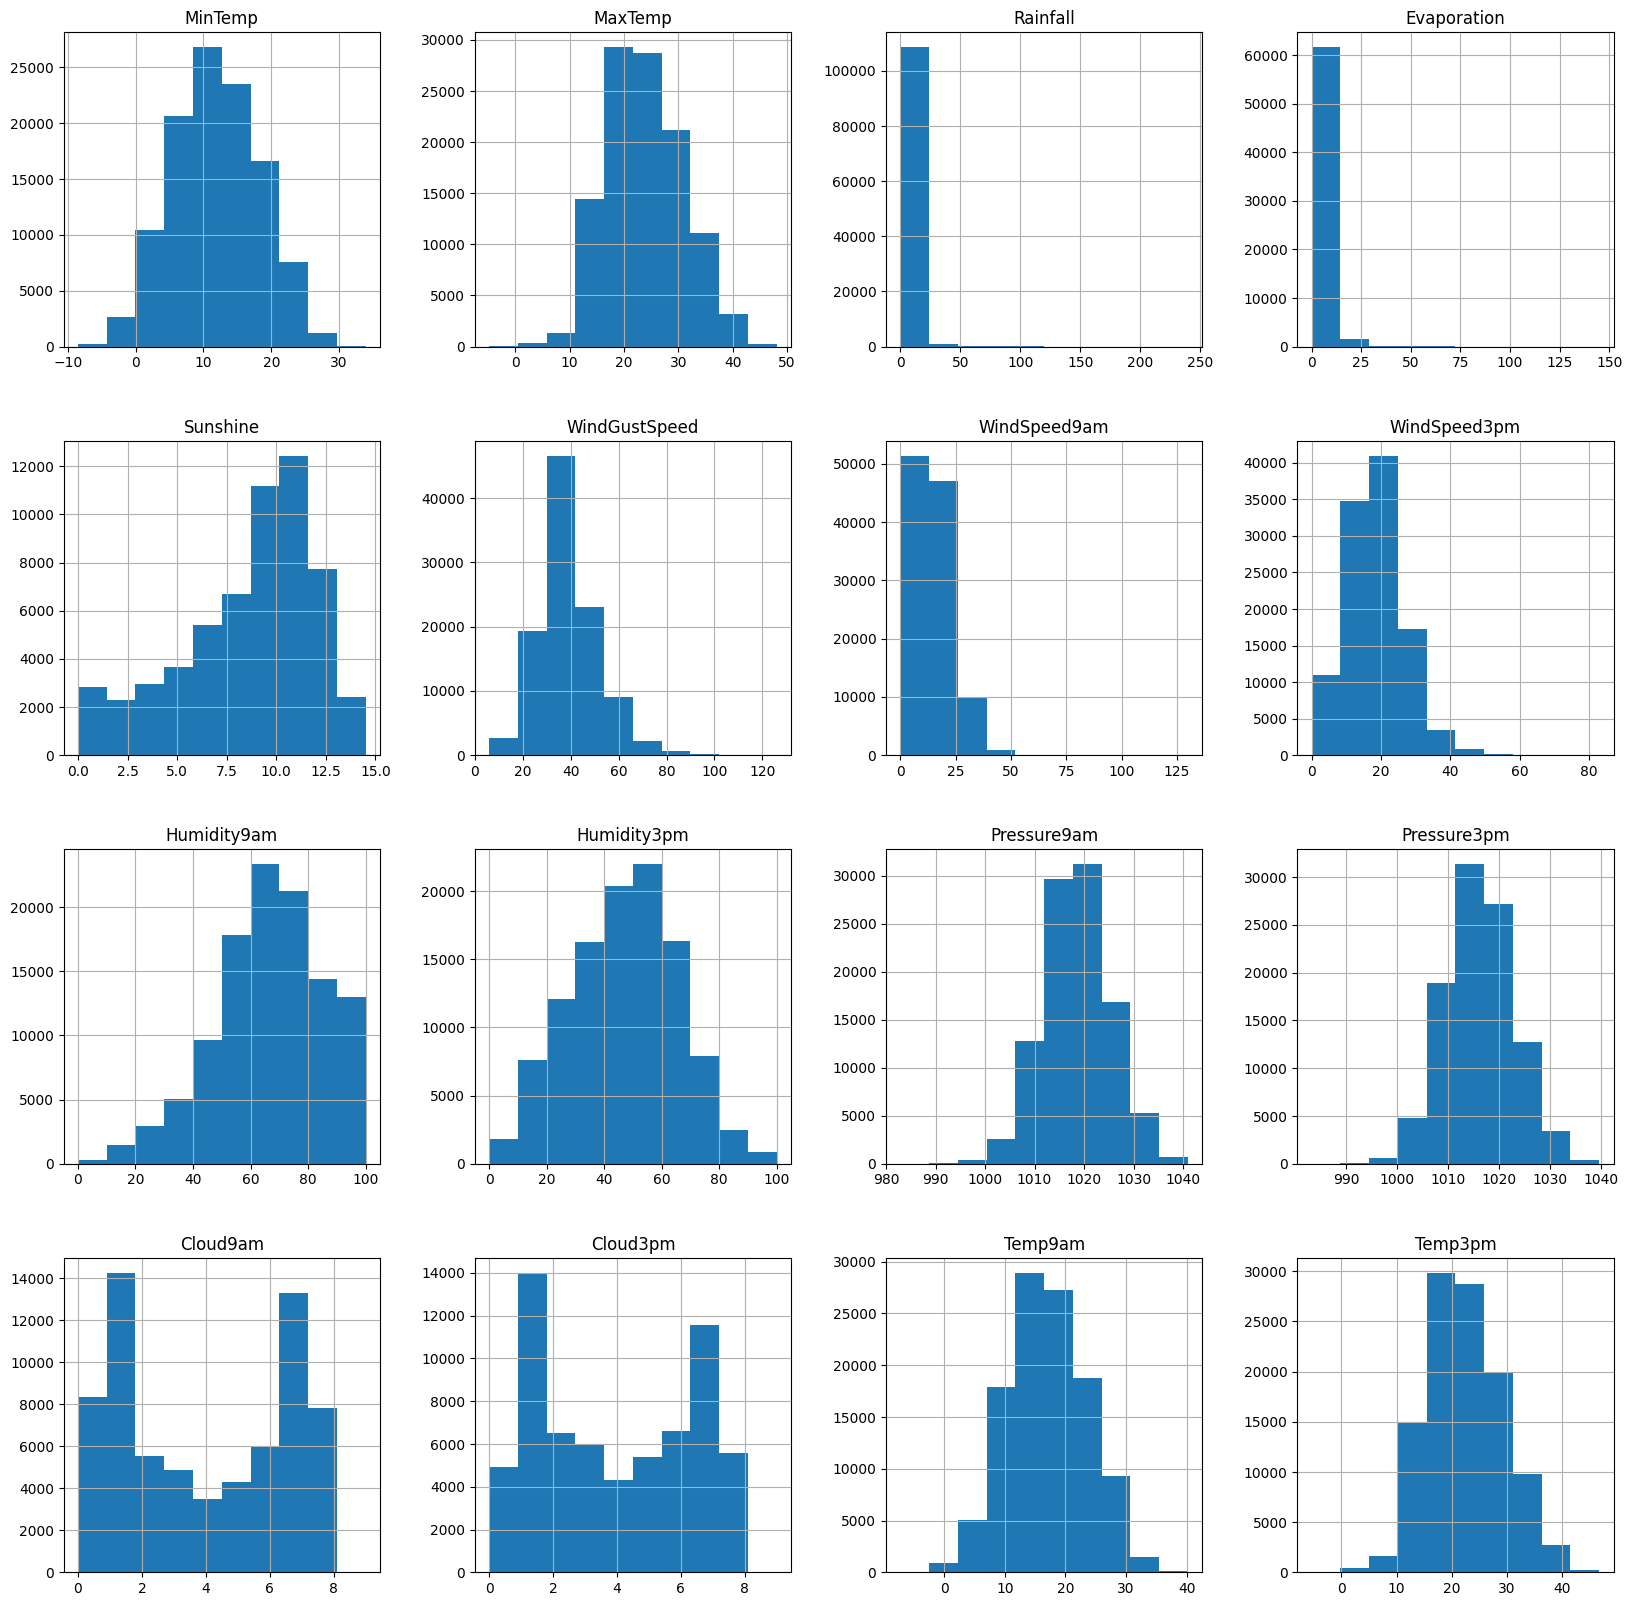

Target: Yes


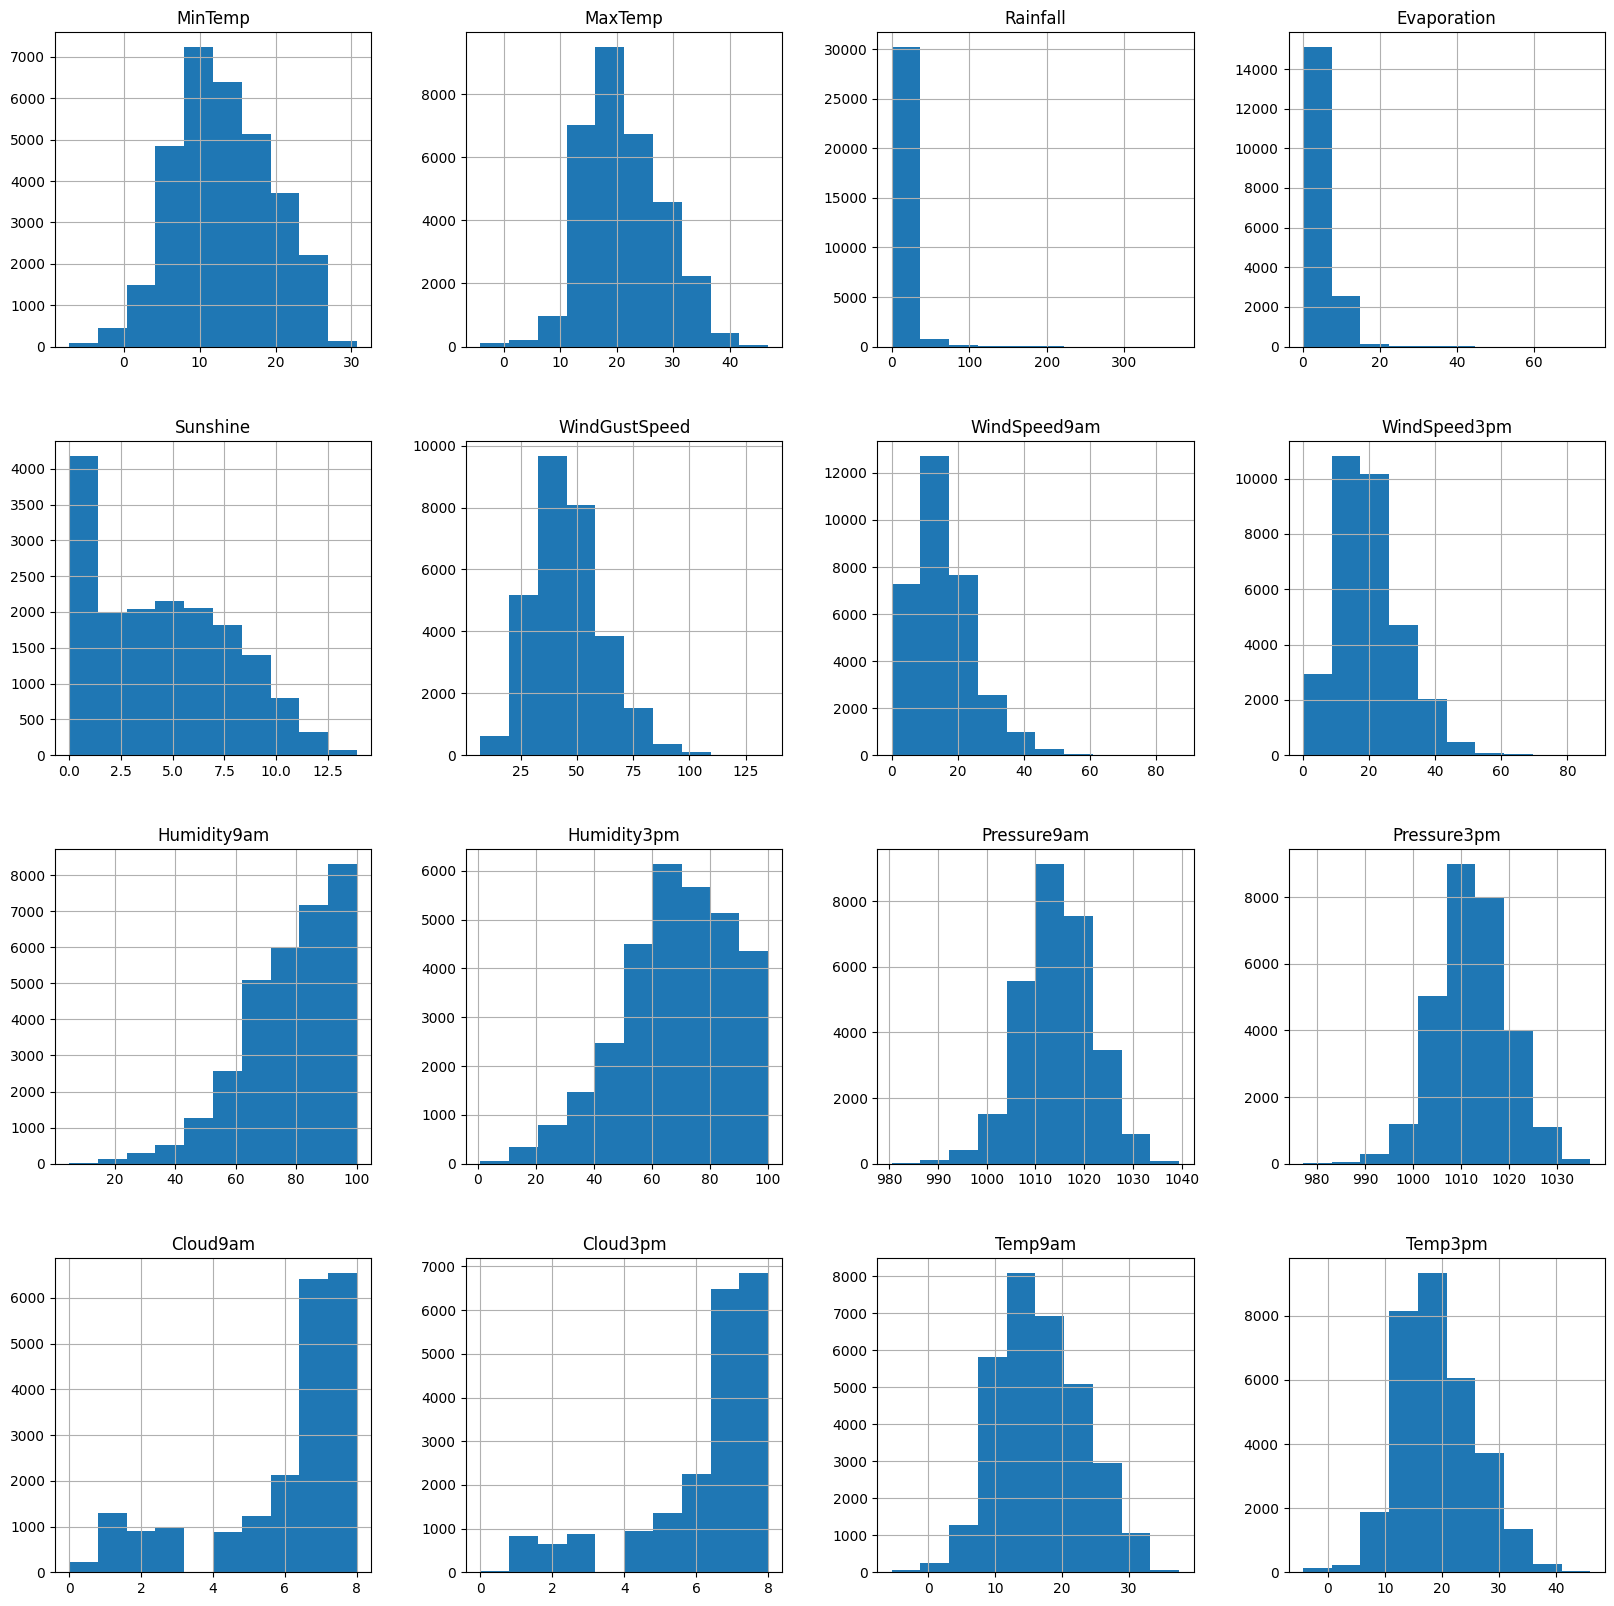

In [6]:
# 1. Pencarian korelasi antarfitur
correlation = df.corr(numeric_only=True)
print("1. Pencarian korelasi antarfitur")
print(correlation, end="\n\n")

# 2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)
visual = df.hist(figsize=(20, 20))
print("2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)")
plt.show()

# 3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)

# remove NA values on RainTomorrow
new_df = df.dropna(subset=[target_name]).groupby(target_name)

# get labels on target 'RainTomorrow'
targets = new_df[target_name].unique()
for i in range(len(targets)):
    targets[i] = str(targets[i][0])

# get dataframes for each target
new_df_target = {}
for target in targets:
    new_df_target[target] = new_df.get_group(target)

print("3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)")
for target in targets:
    print(f"Target: {target}")
    new_df_target[target].hist(figsize=(20, 20))
    plt.show()

## I.4
Lakukanlah analisis lebih lanjut jika diperlukan, kemudian lakukan hal berikut:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan nilai hilang
4. Transformasi data kategorikal menjadi numerikal (_encoding_)
5. _Scaling_ dengan `MinMaxScaler`

In [7]:
# I.4 Put your code here

# II. Desain Eksperimen
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal yang diliputi adalah sebagai berikut:
1. Pembuatan model
2. Proses validasi
3. _Hyperparameter tuning_

## II.1
Tentukanlah metrik yang akan digunakan pada eksperimen kali ini. Metrik yang dapat lebih dari satu jenis.

(Tuliskan jawaban bagian II.1 di sini.)

## II.2 
Bagi data dengan perbandingan 0,8 untuk data latih dan 0,2 untuk data validasi.

In [11]:
# II.2

# Bagi data menjadi x dan y
x = df.copy(deep=True).drop([target_name], axis=1)
y = df[target_name]

# Buat data train dan data test dengan perbandingan 80:20, random_state di-set agar hasilnya dapat direproduksi
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

## II.3
Lakukan hal berikut:
1. Prediksi dengan menggunakan model _logistic regression_ sebagai _baseline_.
2. Tampilkan evaluasi dari model yang dibangun dari metrik yang ditentukan pada II.1
3. Tampilkan _confusion matrix_.

In [ ]:
# II.3 Kode di sini

## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. _Hyperparameter tuning_ untuk model yang dipakai dengan menggunakan _grid search_ (perhatikan _random factor_ pada beberapa algoritma model)
3. Validasi dengan _cross validation_


In [ ]:
# II.4 Kode di sini.

# III. Improvement
Pada bagian ini, kalian diharapkan dapat:
1. melakukan pelatihan dengan data hasil _oversampling_ / _undersampling_, disertai dengan validasi yang benar; serta
2. menerapkan beberapa metode untuk menggabungkan beberapa model.

Kedua hal ini adalah contoh metode untuk meningkatkan kinerja dari model.

## III.1
Lakukanlah:
1. _Oversampling_ pada kelas minoritas pada data latih
2. _Undersampling_ pada kelas mayoritas pada data latih

Pada setiap tahap, latih dengan model *baseline* (II.3), dan validasi dengan data validasi. Data latih dan validasi adalah data yang disusun pada bagian II.2.

In [ ]:
# III.1 Kode di sini.

## III.2
Lakukanlah:
1. Eksplorasi _soft voting_, _hard voting_, dan _stacking_.
2. Buatlah model _logistic regression_ dan SVM.
3. Lakukanlah _soft voting_ dari model-model yang dibangun pada poin 2.
4. Lakukan _hard voting_ dari model-model yang dibangun pada poin 2.
5. Lakukanlah _stacking_ dengan _final classifier_ adalah _logistic regression_ dari model-model yang dibangun pada poin 2.
6. Lakukan validasi dengan metrics yang telah ditentukan untuk poin 3, 4, dan 5.

(Tuliskan hasil eksplorasi III.2 poin 1 di sini.)

In [ ]:
# III.2 Kode di sini.

# IV. Analisis
Bandingkan hasil dari hal-hal berikut:
1. Model _baseline_ (II.3)
2. Model lain (II.4)
3. Hasil _undersampling_
4. Hasil _oversampling_
5. Hasil _soft voting_
6. Hasil _hard voting_
7. Hasil _stacking_

(Tuliskan jawaban bagian IV di sini.)